In [2]:
import numpy as np
import matplotlib.pyplot as plt
from motor_analysis import *
import logging

In [2]:
params = {
    'L_overlap': 25e-6,
    'MF': 2e-6,
    'gap_final': 1e-6,
    'support_springs': (2e-6, 241e-6),
    'width': 4e-6,
    'rho_medium': 1000,
    'mu_medium': 1e-3,
    'epsilon': 80,
    'max_voltage':4,
    'thickness': 40e-6,
    'arm_angle': 67,
    'num_of_fingers': 80
}

In [3]:
motor = InchwormSpeed(**params)
motor.comp_spring_constant_from_dimensions()
motor.g1, motor.g2, motor.thickness, motor.width, motor.L_overlap, motor.finger_length, motor.spring_constant, motor.k_spr

(5.848949632419209e-06,
 8.773424448628814e-06,
 4e-05,
 4e-06,
 2.5e-05,
 3.5000000000000004e-05,
 7.772804913098541,
 7.772804913098541)

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
t,sol = motor.comp_pull_in(t_max=2e-3, return_trajetory=True)

In [5]:
motor.mass, motor.shuttle_width
1/np.sqrt(motor.spring_constant/motor.mass)

2.4402290312694716e-05

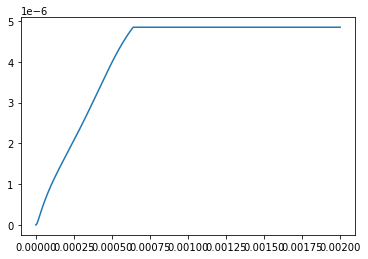

In [6]:
logger.setLevel(logging.CRITICAL)
fig = plt.figure()
ax = plt.axes()
ax.plot(sol['t'], sol['y'][0,:])

None
None
0.000639819
0.000639819
0.000330077
0.000330077
0.000211577
0.000211577
0.000150189
0.000150189
0.00011348400000000001
0.00011348400000000001


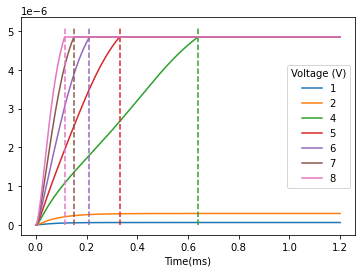

In [7]:
cm = plt.cm.get_cmap('tab10').colors
voltages = [1,2,4,5,6,7,8]
fig,ax = plt.subplots(1,1)
ax = [ax]
lines = []
for i,volt in enumerate(voltages):
    params['max_voltage'] = volt
    motor= InchwormSpeed(**params)
    t,sol = motor.comp_pull_in(t_max = 12e-4, time_step=1e-9, return_trajetory= True)
    line = ax[0].plot(sol['t'][0::10]*1e3, sol['y'][0,:][0::10], color = cm[i])
    lines.append(line[0])
    print(t)
    if t is not None:
        print(t)
        ax[0].plot(t*np.ones((3,1))*1e3, np.linspace(0, 5.1e-6, 3), '--',color = cm[i])
    # ax[1].plot(sol['t']*1e3, sol['y'][1,:])
ax[0].set_xlabel('Time(ms)')
plt.legend(handles = lines, labels = voltages, title='Voltage (V)' )

In [8]:
vel = sol['y'][1,:]
times = sol['t']
x = sol['y'][0,:]
ind = np.min(np.argwhere(x>motor.g1-motor.gap_final))
times[ind]
# vel,times, sol['y'][0,:], ind

0.00011348400000000001

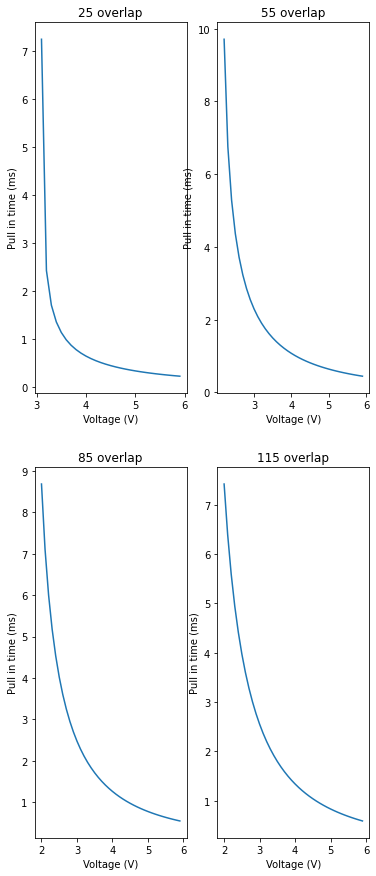

In [9]:
params = {
    'L_overlap': 85e-6,
    'MF': 2e-6,
    'gap_final': 1e-6,
    'support_springs': (2e-6, 241e-6),
    'width': 4e-6,
    'rho_medium': 1000,
    'mu_medium': 1e-3,
    'epsilon': 80,
    'max_voltage':4,
    'thickness': 40e-6,
    'arm_angle': 67,
    'num_of_fingers': 80,
    'shuttle_extension': 100e-6,
    'shuttle_width': 20e-6,
    'etch_hole_size': 8e-6
}
L_overlap = [25e-6, 55e-6, 85e-6, 115e-6]
fig,axs = plt.subplots(2,2)
axs = axs.flatten()
for ind, L in enumerate(L_overlap):
    params['L_overlap'] = L
    voltages = np.arange(2,6, 0.1)
    t = 0*voltages
    for i,volt in enumerate(voltages):
        params['max_voltage'] = volt
        motor= InchwormSpeed(**params)
        # print(motor)
        t[i],sol = motor.comp_pull_in(t_max = 20e-3, time_step = 5e-8)
    axs[ind].plot(voltages, t*1e3)
    axs[ind].set_xlabel('Voltage (V)')
    axs[ind].set_ylabel('Pull in time (ms)')
    axs[ind].set_title(f'{L*1e6:.0f} overlap')
    fig.set_size_inches(6,15)

In [10]:
fig.set_size_inches(12,12)
fig.set_dpi(500)
fig.savefig('shih_fig4_reproduction.png')

0.00019899999999999999
0.001304
0.0042
0.007932
0.010971


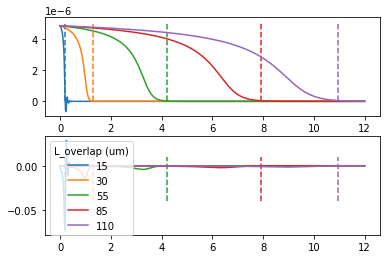

In [11]:
params = {
    'L_overlap': 85e-6,
    'MF': 2e-6,
    'gap_final': 1e-6,
    'support_springs': (2e-6, 241e-6),
    'width': 4e-6,
    'rho_medium': 1000,
    'mu_medium': 1e-3,
    'epsilon': 80,
    'max_voltage':4,
    'thickness': 40e-6,
    'arm_angle': 67,
    'num_of_fingers': 40,
    'shuttle_extension': 100e-6,
    'shuttle_width': 20e-6,
    'etch_hole_size': 8e-6
}
cm = plt.cm.get_cmap('tab10').colors
L_overlaps = np.array([15e-6,30e-6,55e-6, 85e-6, 110e-6])
fig,ax = plt.subplots(2,1)
lines = []
for i,L in enumerate(L_overlaps):
    params['L_overlap'] = L
    motor= InchwormSpeed(**params)
    t,sol = motor.comp_pull_out(t_max = 12e-3, time_step= 1e-6, return_trajetory= True)
    line = ax[0].plot(sol['t']*1e3, sol['y'][0,:], color = cm[i])
    velocity = ax[1].plot(sol['t']*1e3, sol['y'][1,:], color = cm[i])
    lines.append(line[0])
    if t is not None:
        print(t)
        ax[0].plot(t*np.ones((3,1))*1e3, np.linspace(0, 5.1e-6, 3), '--',color = cm[i])
        ax[1].plot(t*np.ones((3,1))*1e3, np.linspace(-0.04, 0.01, 3), '--',color = cm[i])
    # ax[1].plot(sol['t']*1e3, sol['y'][1,:])
ax[0].set_xlabel('Time(ms)')
plt.legend(handles = lines, labels = [f'{L:.0f}' for L in L_overlaps*1e6], title='L_overlap (um)' )

In [12]:
sol['y'][:,0].shape

(2,)

# Pull out time vs voltage
Pull out time is not a function of voltage

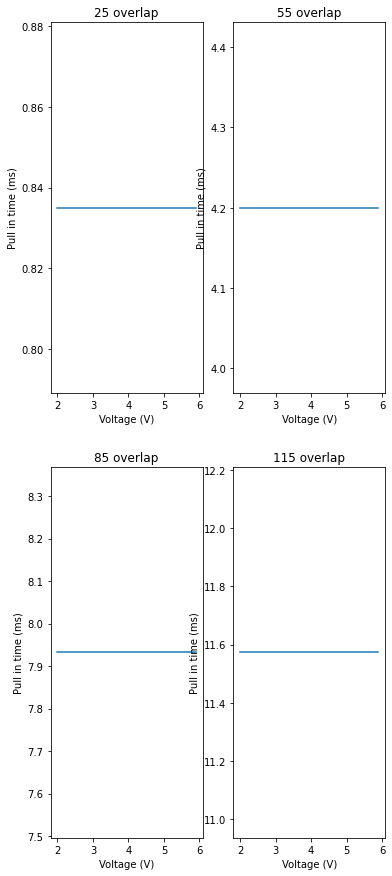

In [13]:
L_overlap = [25e-6, 55e-6, 85e-6, 115e-6]
fig,axs = plt.subplots(2,2)
axs = axs.flatten()
for ind, L in enumerate(L_overlap):
    params['L_overlap'] = L
    voltages = np.arange(2,6, 0.1)
    t = 0*voltages
    for i,volt in enumerate(voltages):
        params['max_voltage'] = volt
        motor= InchwormSpeed(**params)
        # print(motor)
        t[i],sol = motor.comp_pull_out(t_max = 25e-3, time_step=1e-6)
    axs[ind].plot(voltages, t*1e3)
    axs[ind].set_xlabel('Voltage (V)')
    axs[ind].set_ylabel('Pull in time (ms)')
    axs[ind].set_title(f'{L*1e6:.0f} overlap')
    fig.set_size_inches(6,15)

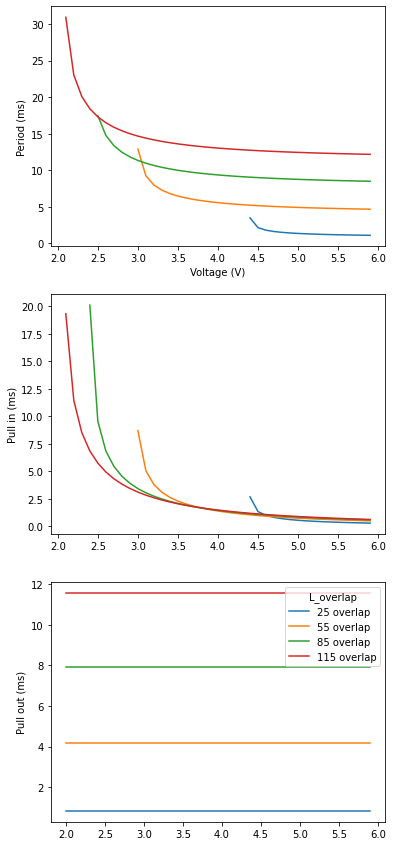

In [23]:
L_overlap = [25e-6, 55e-6, 85e-6, 115e-6]
fig,axs = plt.subplots(3,1)
# axs = axs.flatten()

for ind, L in enumerate(L_overlap):
    params['L_overlap'] = L
    voltages = np.arange(2,6, 0.1)
    period = 0*voltages
    pull_in = 0*voltages
    pull_out = 0 * voltages
    for i,volt in enumerate(voltages):
        params['max_voltage'] = volt
        motor= InchwormSpeed(**params)
        # print(motor)
        period[i] = motor.comp_period()
        pull_in[i],_ = motor.comp_pull_in(t_max = 60e-3)
        pull_out[i],_ = motor.comp_pull_out(t_max = 60e-3)
    axs[0].plot(voltages, period*1e3)
    axs[1].plot(voltages, pull_in*1e3)
    axs[2].plot(voltages, pull_out*1e3)
axs[0].set_xlabel('Voltage (V)')
axs[0].set_ylabel('Period (ms)')
axs[1].set_ylabel('Pull in (ms)')
axs[2].set_ylabel('Pull out (ms)')
plt.legend([f'{L*1e6:.0f} overlap' for L in L_overlap], title = f'L_overlap')
    # axs.set_title(f'{L*1e6:.0f} overlap')
fig.set_size_inches(6,15)

# fastest time

In [20]:
params = {
    'L_overlap': 10e-6,
    'MF': 2e-6,
    'gap_final': 1e-6,
    'support_springs': (2e-6, 241e-6),
    'width': 4e-6,
    'rho_medium': 1000,
    'mu_medium': 1e-3,
    'epsilon': 80,
    'max_voltage':5.5,
    'thickness': 40e-6,
    'arm_angle': 67,
    'num_of_fingers': 80,
    'shuttle_extension': 80e-6,
    'shuttle_width': 20e-6,
    'etch_hole_size': 8e-6
}
motor = InchwormSpeed(**params)

In [21]:
t, _ = motor.comp_pull_in()

In [22]:
print( f'Computed pull in is {t*1e6:.0f} us. Compare with shih reported value of 121 us')

Computed pull in is 134 us. Compare with shih reported value of 121 us
